In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\prasa\OneDrive\Documents\KC\CODES 2024\project24\CSV_XLXS\UberDataset.csv")

In [3]:
# Display the first few rows of the dataset
print(df.head())

         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  


In [4]:
print(df.describe())

              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


In [5]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64
START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object


In [6]:
# Fill missing values or drop rows/columns with missing values
df = df.dropna()  # Simple approach, you can use more sophisticated imputation if needed

In [7]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Check data types
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object


In [10]:
# Convert START_DATE and END_DATE to datetime if they are not already
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

# Convert MILES to numeric if it's not
df['MILES'] = pd.to_numeric(df['MILES'], errors='coerce')

# Recheck data types after conversion
print("\nData types after conversion:")
print(df.dtypes)

# Handle missing values
# Drop rows with missing values
df = df.dropna()

# If you want to fill missing values instead, you could use:
# df['CATEGORY'] = df['CATEGORY'].fillna('Unknown')
# df['START'] = df['START'].fillna('Unknown')
# df['STOP'] = df['STOP'].fillna('Unknown')
# df['MILES'] = df['MILES'].fillna(df['MILES'].mean())  # or median, or any other strategy
# df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')

# Recheck for any remaining missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df.head())


Data types after conversion:
START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

Missing values after cleaning:
START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

First few rows of the cleaned dataset:
           START_DATE            END_DATE  CATEGORY            START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   

              STOP  MILES          PURPOSE  
0      Fort Pierce    5.1   Meal/Entertain  
2      Fort Pierce    4.8  Errand

In [11]:
df['CATEGORY'] = df['CATEGORY'].str.strip().str.lower()
df['START'] = df['START'].str.strip().str.title()
df['STOP'] = df['STOP'].str.strip().str.title()
df['PURPOSE'] = df['PURPOSE'].str.strip().str.lower()


In [12]:
df = df.drop_duplicates()

In [13]:
df = df[df['MILES'] > 0]  # Assuming distance should be positive

In [14]:
df = df[df['END_DATE'] > df['START_DATE']]

In [15]:
print(df.describe())

            MILES
count  652.000000
mean    11.198313
std     23.004020
min      0.500000
25%      3.200000
50%      6.400000
75%     10.400000
max    310.300000


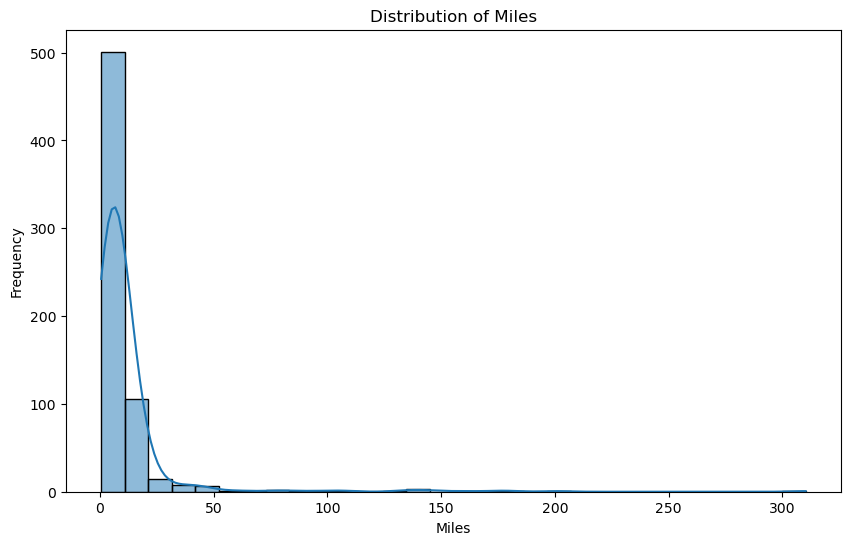

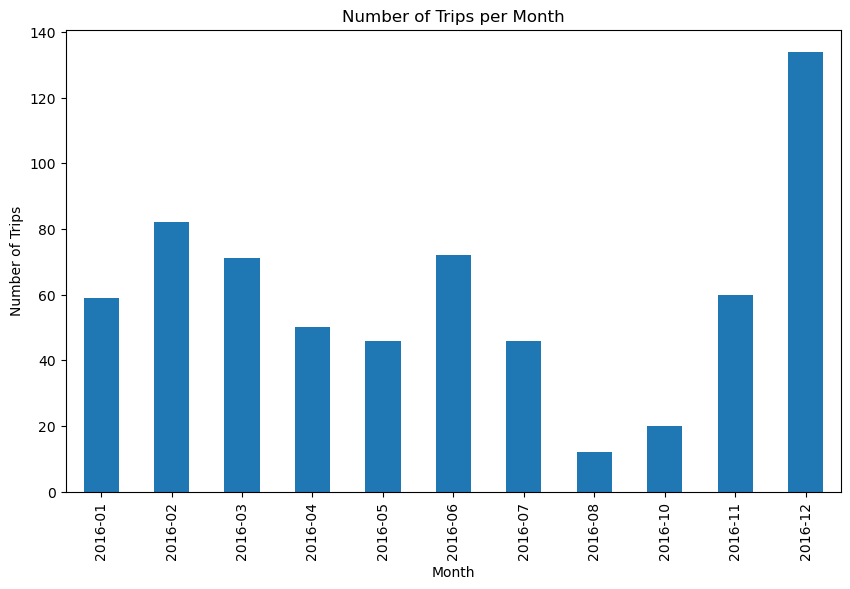

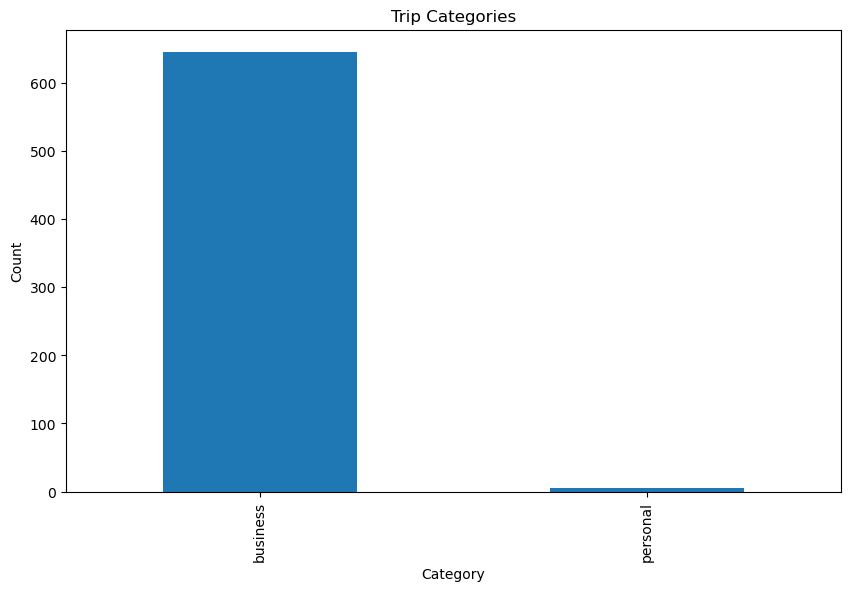

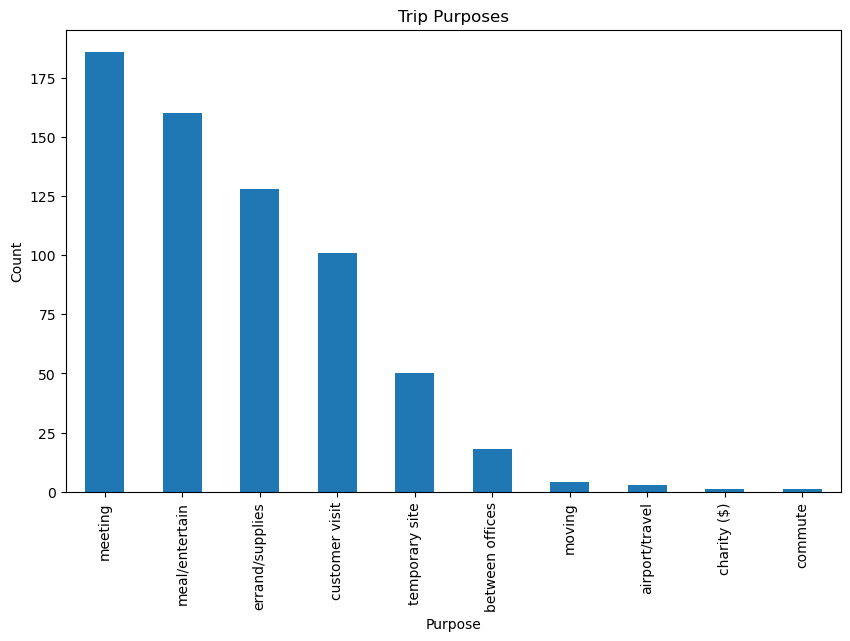

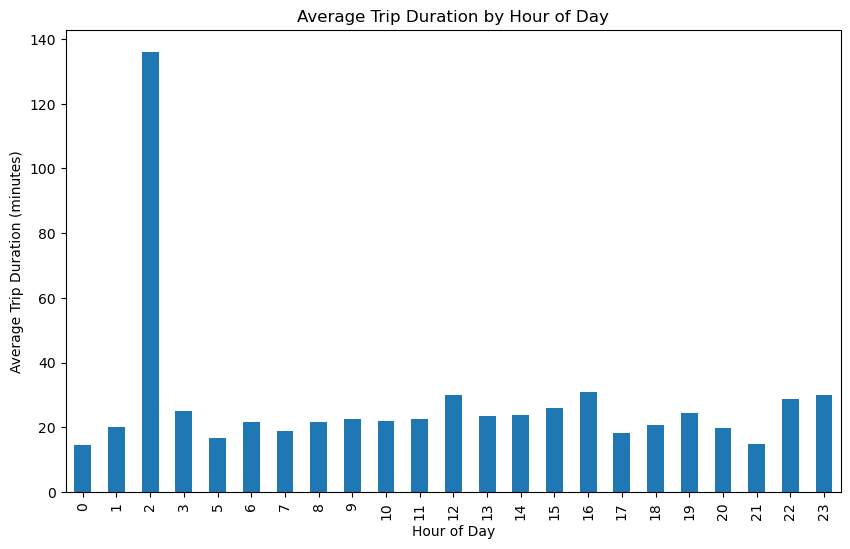

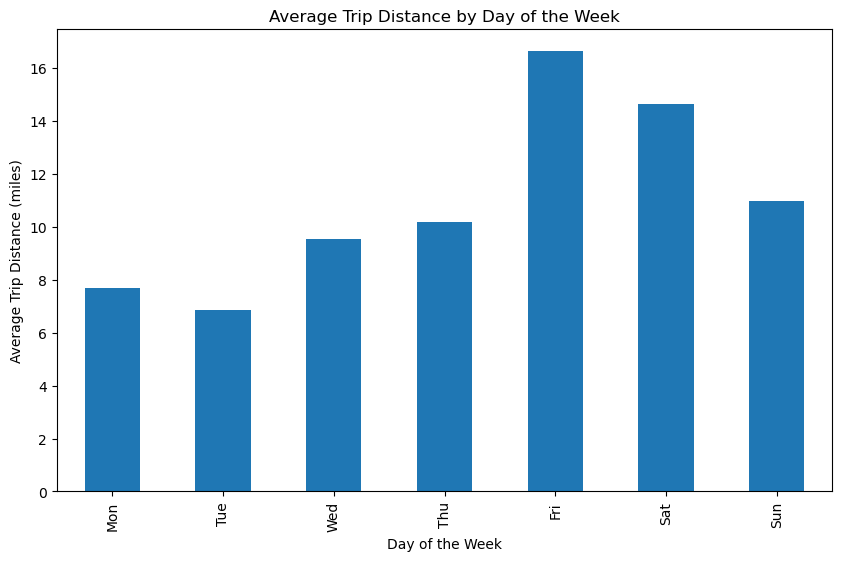

NameError: name 'latitude' is not defined

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of miles
plt.figure(figsize=(10, 6))
sns.histplot(df['MILES'], bins=30, kde=True)
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

# Trips over time
plt.figure(figsize=(10, 6))
df['START_DATE'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Number of Trips per Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()
# Category distribution
plt.figure(figsize=(10, 6))
df['CATEGORY'].value_counts().plot(kind='bar')
plt.title('Trip Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Purpose distribution
plt.figure(figsize=(10, 6))
df['PURPOSE'].value_counts().plot(kind='bar')
plt.title('Trip Purposes')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()
df['TRIP_DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60  # Trip duration in minutes

# Average trip duration by hour of the day
plt.figure(figsize=(10, 6))
df.groupby(df['START_DATE'].dt.hour)['TRIP_DURATION'].mean().plot(kind='bar')
plt.title('Average Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

# Average trip distance by day of the week
plt.figure(figsize=(10, 6))
df.groupby(df['START_DATE'].dt.dayofweek)['MILES'].mean().plot(kind='bar')
plt.title('Average Trip Distance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()
import folium

# Create a map centered at a specific location
m = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add start and stop points to the map
for idx, row in df.iterrows():
    folium.Marker([row['start_lat'], row['start_lon']], popup=row['START']).add_to(m)
    folium.Marker([row['stop_lat'], row['stop_lon']], popup=row['STOP']).add_to(m)

# Display the map
m.save('map.html')
from sklearn.cluster import KMeans

# Example: Clustering based on start and stop locations
coords = df[['start_lat', 'start_lon', 'stop_lat', 'stop_lon']].dropna()
kmeans = KMeans(n_clusters=5, random_state=0).fit(coords)
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='start_lon', y='start_lat', hue='cluster', data=df, palette='viridis')
plt.title('Trip Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
!pip install folium


In [ ]:
import folium

# Sample data: assuming df has columns 'start_lat', 'start_lon', 'stop_lat', 'stop_lon'
# Add start and stop points to the map
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)  # Center map on San Francisco, for example

for idx, row in df.iterrows():
    folium.Marker([row['start_lat'], row['start_lon']], popup=row['START']).add_to(m)
    folium.Marker([row['stop_lat'], row['stop_lon']], popup=row['STOP']).add_to(m)

# Save and display the map
m.save('map.html')


In [ ]:
!pip install geopy


In [17]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="uber_analysis")

def geocode(address):
    try:
        location = geolocator.geocode(address)
        return location.latitude, location.longitude
    except:
        return None, None

# Apply geocoding to START and STOP locations
df['start_lat'], df['start_lon'] = zip(*df['START'].apply(geocode))
df['stop_lat'], df['stop_lon'] = zip(*df['STOP'].apply(geocode))

# Sleep to avoid overloading the geocoding service
time.sleep(1)

# Drop rows where geocoding failed
df = df.dropna(subset=['start_lat', 'start_lon', 'stop_lat', 'stop_lon'])

# Now you can create the map as shown above
m = folium.Map(location=[df['start_lat'].mean(), df['start_lon'].mean()], zoom_start=12)

for idx, row in df.iterrows():
    folium.Marker([row['start_lat'], row['start_lon']], popup=row['START']).add_to(m)
    folium.Marker([row['stop_lat'], row['stop_lon']], popup=row['STOP']).add_to(m)

m.save('map.html')


In [18]:
print(df.describe())

            MILES  TRIP_DURATION   start_lat   start_lon    stop_lat  \
count  638.000000     638.000000  638.000000  638.000000  638.000000   
mean    11.244357      23.227273   34.504908  -42.994868   34.894086   
std     23.230767      25.613724   14.277944   62.355438   14.551327   
min      0.500000       2.000000   -3.652222 -122.419329   -3.652222   
25%      3.200000      11.000000   31.565682  -78.781208   31.565682   
50%      6.400000      17.500000   35.788289  -78.639099   35.788289   
75%     10.400000      27.000000   40.735657   -1.750000   40.760113   
max    310.300000     330.000000   57.204185  128.228828   57.204185   

         stop_lon  
count  638.000000  
mean   -42.395435  
std     61.145153  
min   -122.419329  
25%    -78.781208  
50%    -78.639099  
75%     -1.750000  
max    128.228828  


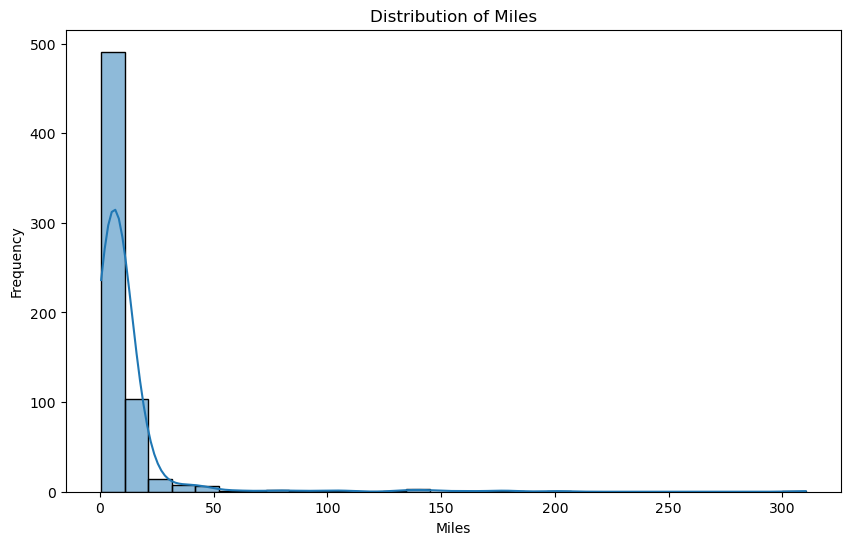

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['MILES'], bins=30, kde=True)
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

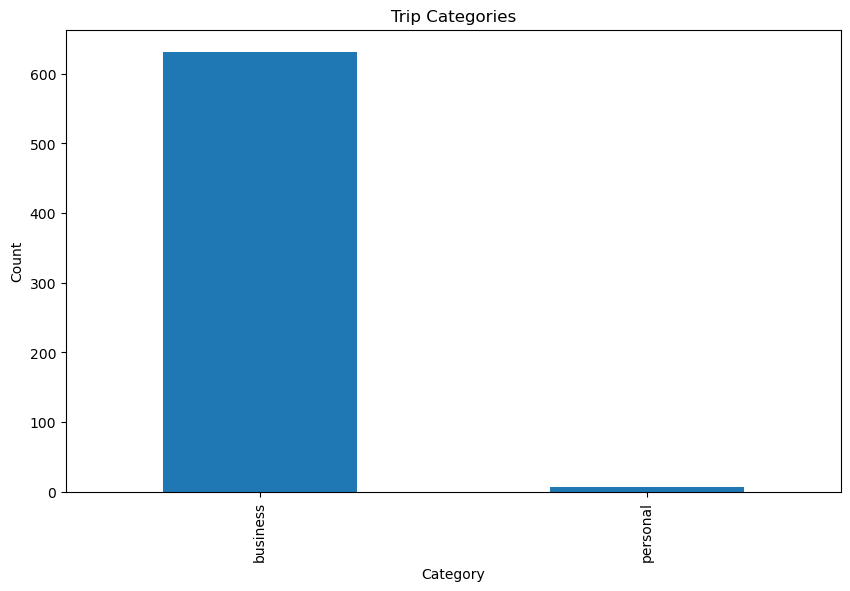

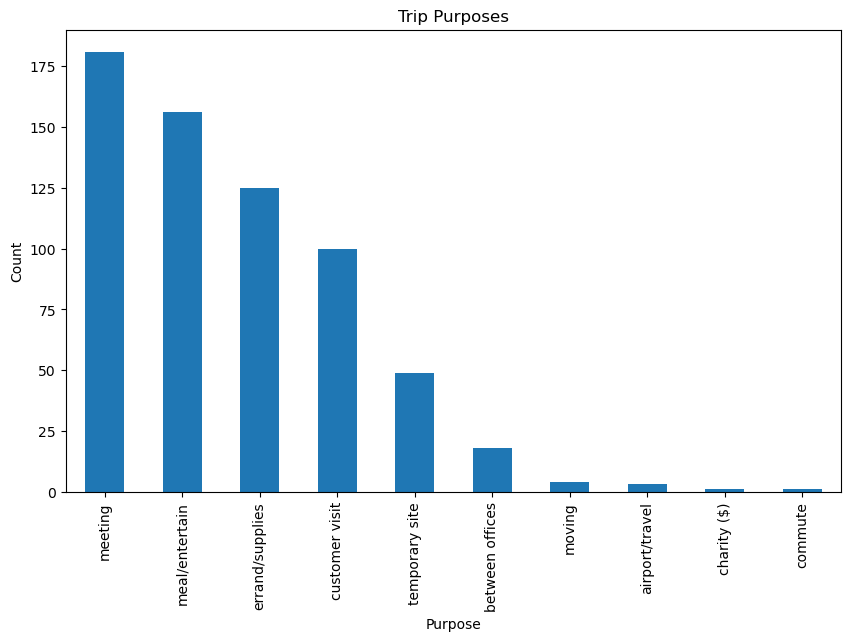

In [20]:
plt.figure(figsize=(10, 6))
df['CATEGORY'].value_counts().plot(kind='bar')
plt.title('Trip Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
df['PURPOSE'].value_counts().plot(kind='bar')
plt.title('Trip Purposes')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()


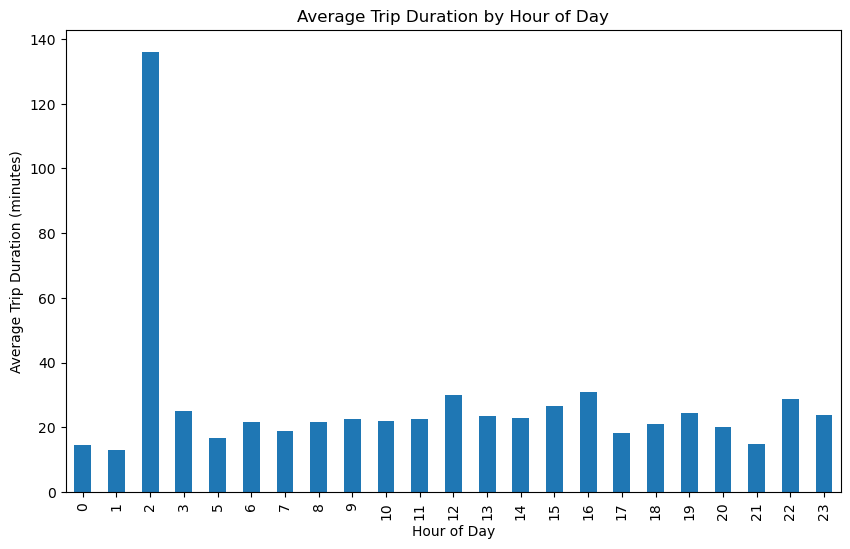

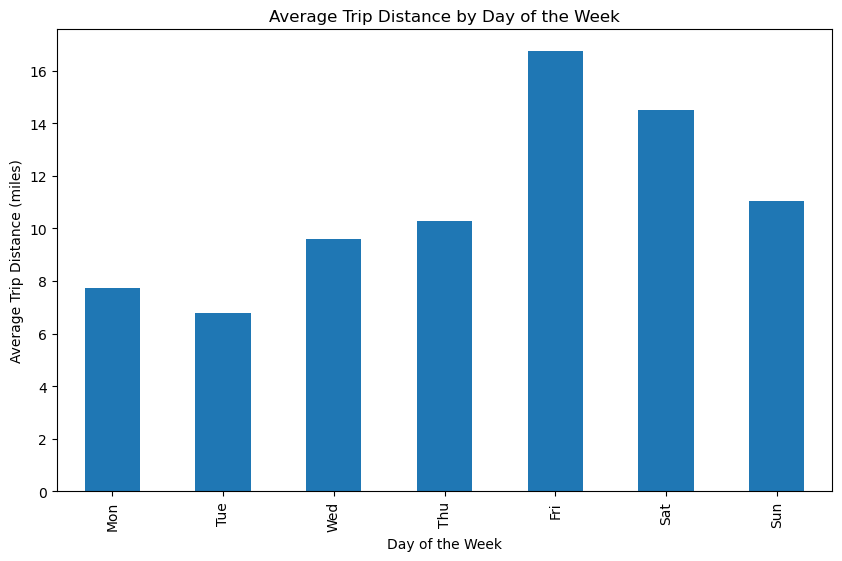

In [21]:
df['TRIP_DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60  # Trip duration in minutes

plt.figure(figsize=(10, 6))
df.groupby(df['START_DATE'].dt.hour)['TRIP_DURATION'].mean().plot(kind='bar')
plt.title('Average Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
df.groupby(df['START_DATE'].dt.dayofweek)['MILES'].mean().plot(kind='bar')
plt.title('Average Trip Distance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example: Predicting trip duration based on other features
X = df[['MILES', 'start_lat', 'start_lon', 'stop_lat', 'stop_lon']]  # Features
y = df['TRIP_DURATION']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')


Mean Squared Error: 93.32404616884364
R^2 Score: 0.8448671814187411


C:\Users\prasa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


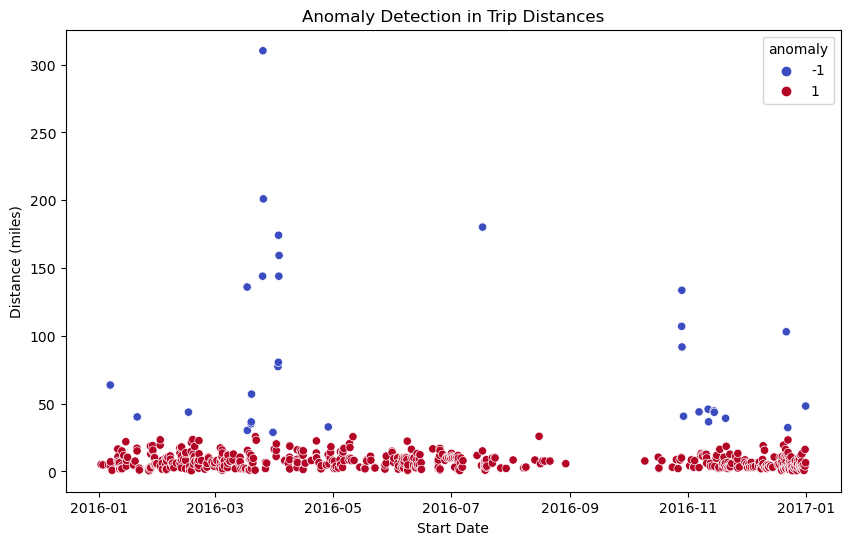

In [23]:
from sklearn.ensemble import IsolationForest

# Example: Detecting anomalies in trip distances
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination factor as needed
df['anomaly'] = iso_forest.fit_predict(df[['MILES']])

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='START_DATE', y='MILES', hue='anomaly', data=df, palette='coolwarm')
plt.title('Anomaly Detection in Trip Distances')
plt.xlabel('Start Date')
plt.ylabel('Distance (miles)')
plt.show()


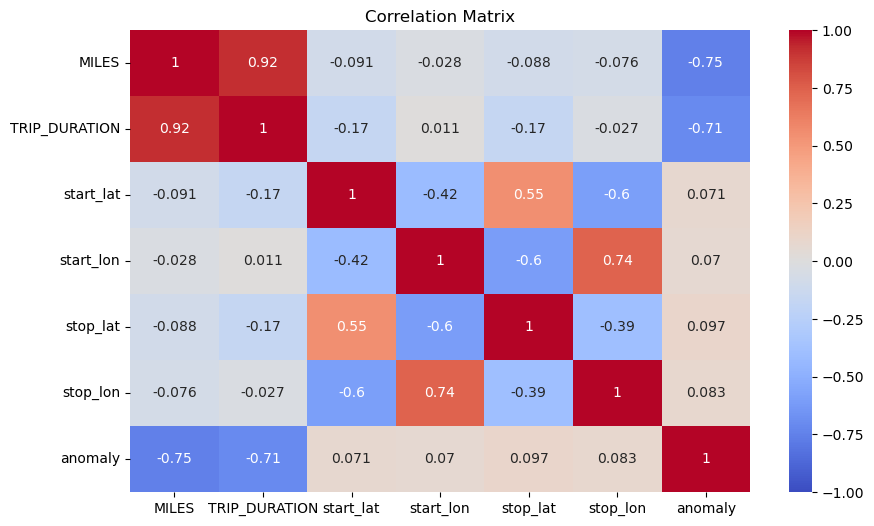

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
